In [19]:
import pandas as pd

In [20]:
# carregar planihas excel e concatenar em df
df1 = pd.read_excel('Aracaju.xlsx')
df2 = pd.read_excel('Fortaleza.xlsx')
df3 = pd.read_excel('Natal.xlsx')
df4 = pd.read_excel('Recife.xlsx')
df5 = pd.read_excel('Salvador.xlsx')
df = pd.concat([df1,df2,df3,df4,df5])

In [21]:
# imprimir registos aleatórios como amostra
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
43,Fortaleza,2019-01-01,191.52,1004,1
131,Salvador,2019-03-02,63.48,1037,3
67,Recife,2019-01-01,179.52,983,5
55,Recife,2019-01-01,20.03,983,4
15,Salvador,2019-01-01,NaN,1036,3
3,Recife,2019-02-10,160.54,981,3
137,Recife,2019-03-02,51.99,983,3
8,Fortaleza,2019-02-11,37.49,1005,1
228,Natal,2019-01-02,6.87,1037,3
0,Recife,2019-01-01,162.61,981,1


In [22]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [23]:
# moficar o tipo de dado do campo
df['LojaID'] = df['LojaID'].astype('object')

### **Tratamento dos valores faltantes**

In [26]:
# consultado as linhas nulas

df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [25]:
#converter os valores nulos pela média do mesmo campo
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
# substituir valores nulos por zero
df['Vendas'].fillna(0, inplace=True)

In [28]:
# apagar os registros com valores nulos com base na colunas vendas
df.dropna(subset=['Vendas'],inplace=True)

In [29]:
# apagar os registros nulos em geral
df.dropna(how='all', inplace=True)

### **Criar novas colunas**

In [30]:
#mul = multiplicação
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [31]:
df['Receita'].max()

3544.0

In [32]:
df['Receita'].min()

3.34

In [33]:
# retornar as x linhas com maiores receitas
df.nlargest(3,'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [34]:
# retornar as x linhas com piores receitas
df.nsmallest(3,'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [35]:
# agrupamento por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.250000
Fortaleza     37913.970000
Natal        167227.520000
Recife        51936.510000
Salvador      41829.745613
Name: Receita, dtype: float64

In [36]:
# ordenar df
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


### **Trabalhando com datas**

In [40]:
#transfromando data para tipo inteiro
df['Data'] = df['Data'].astype('int64')
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [43]:
df['Data'] = pd.to_datetime(df['Data'])
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [44]:
# agrupando dor ano e somando a receita
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.530000
2019    229479.465613
Name: Receita, dtype: float64

In [46]:
#criando coluna ano
df['Ano_Venda'] = df['Data'].dt.year
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018


In [48]:
df['Mês_venda'], df['Dia_Venda'] = (df['Data'].dt.month, df['Data'].dt.day)
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_venda,Dia_Venda
168,Salvador,2019-01-02,20.22,1036,1,20.22,2019,1,2
114,Recife,2019-03-02,16.82,983,4,67.28,2019,3,2
105,Fortaleza,2019-01-01,174.66,1004,1,174.66,2019,1,1
87,Recife,2019-01-01,210.06,983,4,840.24,2019,1,1
103,Recife,2019-01-01,41.65,982,3,124.95,2019,1,1
15,Fortaleza,2019-01-01,195.05,1002,2,390.10,2019,1,1
112,Recife,2019-03-02,133.59,982,1,133.59,2019,3,2
79,Natal,2019-02-28,557.00,852,4,2228.00,2019,2,28
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2
76,Fortaleza,2019-01-01,38.61,1004,4,154.44,2019,1,1


In [49]:
# data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [51]:
# criando a coluna trimestre
df['Trimestre_Venda'] = df['Data'].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_venda,Dia_Venda,Trimestre_Venda
15,Fortaleza,2019-01-01,195.05,1002,2,390.10,2019,1,1,1
180,Natal,2019-01-02,116.63,1035,2,233.26,2019,1,2,1
114,Recife,2019-03-02,16.82,983,4,67.28,2019,3,2,1
49,Salvador,2019-01-01,37.88,1034,2,75.76,2019,1,1,1
120,Aracaju,2018-01-01,7.73,1520,10,77.30,2018,1,1,1


In [53]:
# filtrando por mês e ano
vendas_marco_19 = df.loc[(df['Data'].dt.year ==2019) &(df['Data'].dt.month == 3)]
vendas_marco_19.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_venda,Dia_Venda,Trimestre_Venda
119,Salvador,2019-03-02,136.37,1034,2,272.74,2019,3,2,1
114,Salvador,2019-03-02,25.52,1034,1,25.52,2019,3,2,1
126,Fortaleza,2019-03-02,41.87,980,8,334.96,2019,3,2,1
111,Recife,2019-03-02,8.00,981,3,24.00,2019,3,2,1
32,Natal,2019-03-17,244.00,854,2,488.00,2019,3,17,1
108,Recife,2019-03-02,152.89,981,4,611.56,2019,3,2,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,1
131,Recife,2019-03-02,139.07,982,6,834.42,2019,3,2,1
116,Recife,2019-03-02,79.10,982,2,158.20,2019,3,2,1
118,Recife,2019-03-02,17.70,981,5,88.50,2019,3,2,1


### **Visualização de Dados**

In [54]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

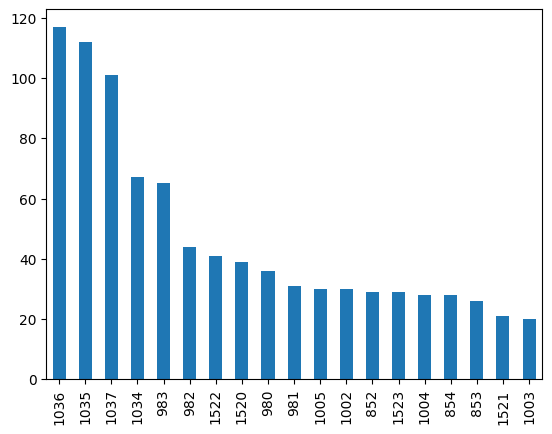

In [56]:
df['LojaID'].value_counts(ascending=False).plot.bar();

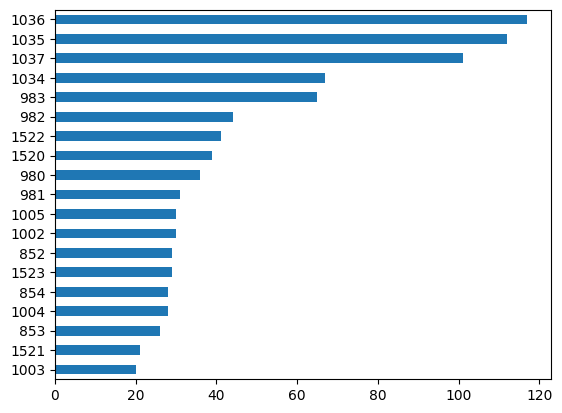

In [58]:
df['LojaID'].value_counts(ascending=True).plot.barh();

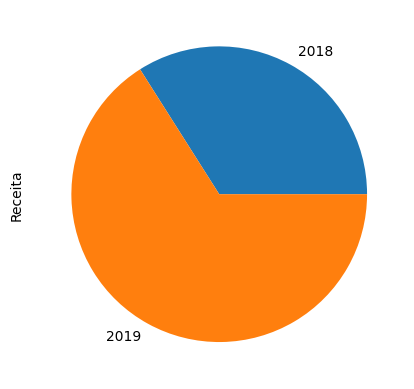

In [60]:
# gráfico de pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

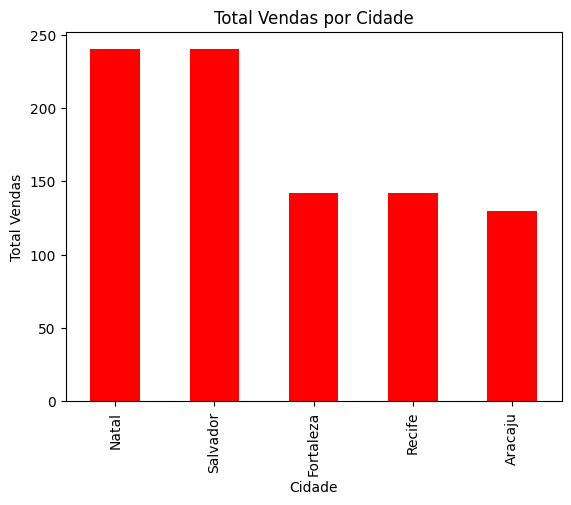

In [65]:
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total Vendas por Cidade', color = 'red')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

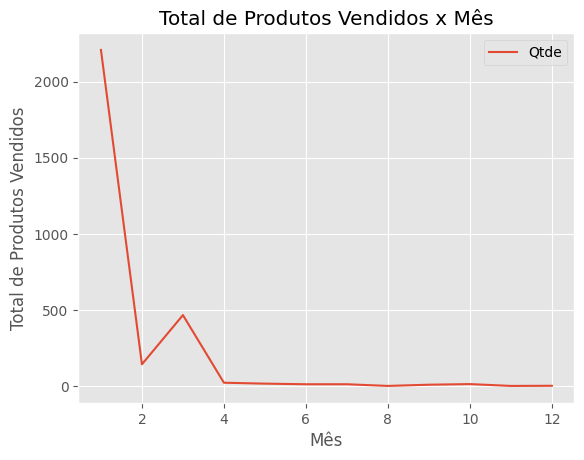

In [70]:
# alterando o estilo (background)
plt.style.use('ggplot')
df.groupby(df['Mês_venda'])['Qtde'].sum().plot(title='Total de Produtos Vendidos x Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Produtos Vendidos')
plt.legend();

In [74]:
df.groupby(df['Mês_venda'])["Qtde"].sum()

Mês_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [81]:
df_2019 = df[df['Ano_Venda'] == 2019]
df_2019.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_venda,Dia_Venda,Trimestre_Venda
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,2019,1,1,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,2019,1,1,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,2019,1,1,1
10,Aracaju,2019-01-01,42.34,1522,6,254.04,2019,1,1,1
11,Aracaju,2019-01-01,161.53,1520,4,646.12,2019,1,1,1


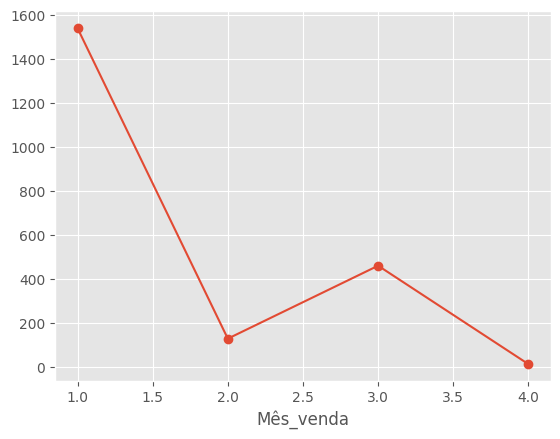

In [78]:
df_2019.groupby(df_2019['Mês_venda'])['Qtde'].sum().plot(marker = 'o');


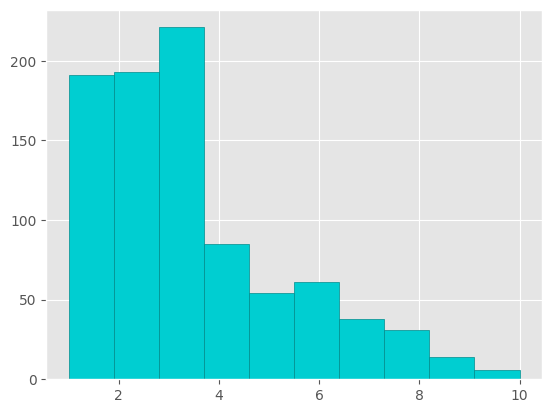

In [90]:
# histograma
plt.hist(df['Qtde'], color = 'darkturquoise',edgecolor='darkcyan');

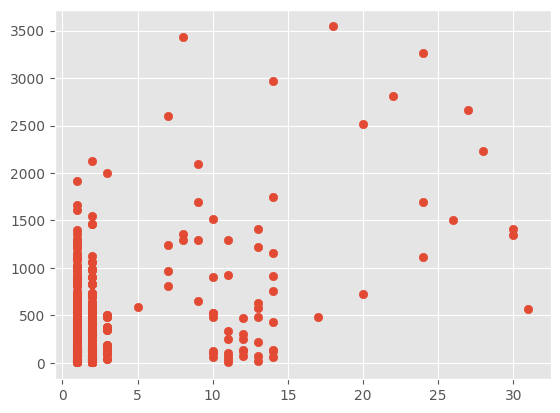

In [92]:
plt.scatter(x=df_2019['Dia_Venda'], y=df_2019['Receita']);

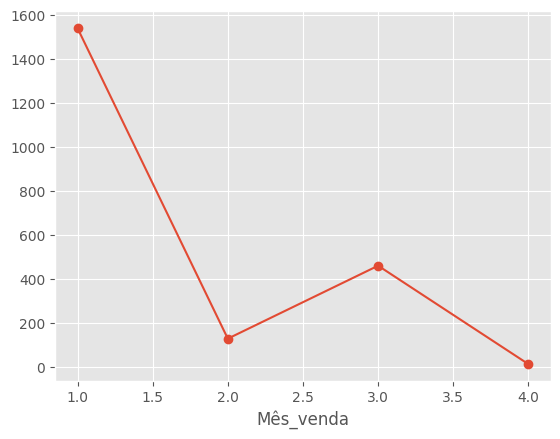

In [95]:
# salvando o gráfico em PNG
df_2019.groupby(df_2019["Mês_venda"])["Qtde"].sum().plot(marker = "o");
plt.savefig("xfp")